# Cranked Wing

Let us import the necessary libraries :


In [56]:
%matplotlib inline
%run ./resources/init.py

## Intro

Here we call <i>cranked wing</i> a wing planform whose leading edge and trailing edge are piecewise linear.We consider half-wings made of two <i>panels</i>, 
<ul>
<li>an <i>inner panel</i>,attached to the fuselage or starting at the aircraft symmetry plane,</li>
<li>an <i>outer panel</i>,that we'll call panel 2,attached to the inner panel, whose tip is the wing tip.</li>
</ul>

Examples of two-panel wing planform are depicted below.

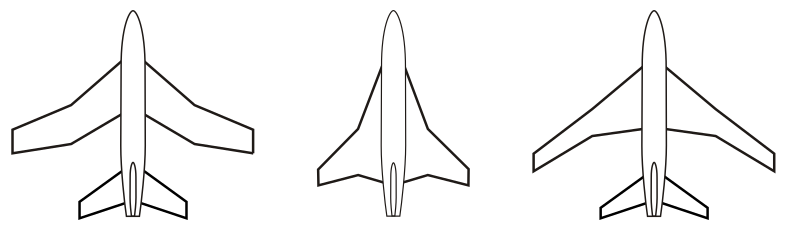

In [57]:
SVG(filename='./resources/Cranked_Wing_Examples.svg')

 We will assign the basic geometric parameters of the planform and will calculate some derived variables that are needed in the aerodynamic analysis of the wing.

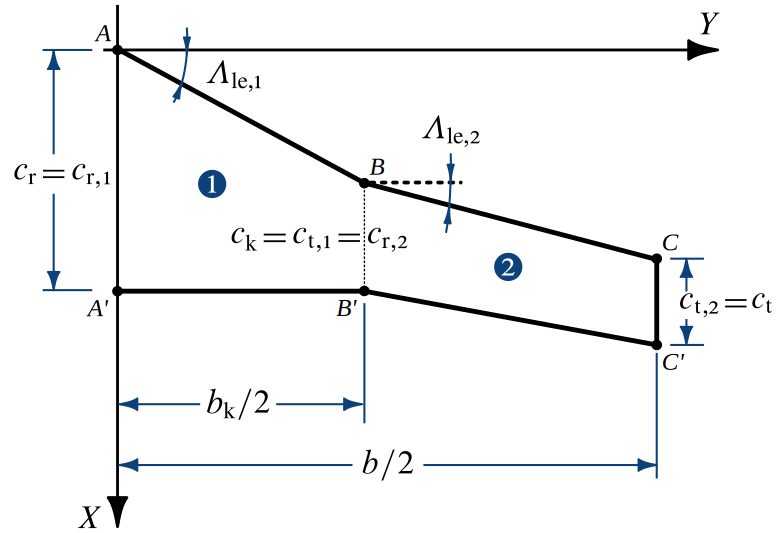

In [58]:
SVG(filename='./resources/cranked_wing_WEB.svg')

The inner and outer panels are referred to as "Panel 1" and "Panel 2," respectively. The inner panel's root chord is the wing root chord $c_{\mathrm{r}}$, the outer panel's tip chord is the wing tip chord $c_{\mathrm{t}}$. The inner panel's tip section coincide with the outer panel's root section. The wing profile at the attachment spanwise station $y=\frac{1}{2}b_{\mathrm{k}}$ of the two panels is called <i>kink section</i>. The chord at kink section is named $c_{\mathrm{k}}$.

Let us assign the wing planform shape.
In Python we define the following variables:

In [59]:
c_r = 5.2; c_k = 3.0; c_t = 2.2; 
b_k = 14.74; b = 26.8;  b_k2=b-b_k;
Lambda_le_1_d=32; Lambda_le_2_d=12
Lambda_le_1 = Lambda_le_1_d*math.pi/180
Lambda_le_2 = Lambda_le_2_d*math.pi/180

In [60]:
Latex(r'\begin{array}{rl}'
        +  r'\text{Root chord,}\, c_{\mathrm{r}}: & ' + r'{0}'.format(c_r) + r'\,\text{m}'
        +  r'\\'
        +  r'\text{Kink chord,}\, c_{\mathrm{k}}: & ' + r'{0}'.format(c_k) + r'\,\text{m}'
        +  r'\\'
        +  r'\text{Tip chord,}\, c_{\mathrm{t}}: & ' + r'{0}'.format(c_t) + r'\,\text{m}'
        +  r'\\'
        +  r'\text{Semispan, inner panel}\, \frac{1}{2}b_{\mathrm{k}}: & ' + r'{0}'.format(b_k/2) + r'\,\text{m}'
        +  r'\\'
        +  r'\text{Semispan, outer panel}\, \frac{1}{2}b_{\mathrm{k,2}}: & ' + r'{0}'.format(b_k2/2) + r'\,\text{m}'
        +  r'\\'
        +  r'\text{Semispan,}\, \frac{1}{2}b: & ' + r'{0}'.format(b/2) + r'\,\text{m}'
        +  r'\\'
        +  r'\text{Leading edge sweep, inner panel,}\, \Lambda_{\mathrm{le},1}: &' 
        +  r'{0}'.format(Lambda_le_1_d) + r'\,\text{deg}'
        +  r'\\'
        +  r'\text{Leading edge sweep, outer panel,}\, \Lambda_{\mathrm{le},2}: &' 
        +    r'{0}'.format(Lambda_le_2_d) + r'\,\text{deg}'
      +r'\end{array}'
)

<IPython.core.display.Latex object>

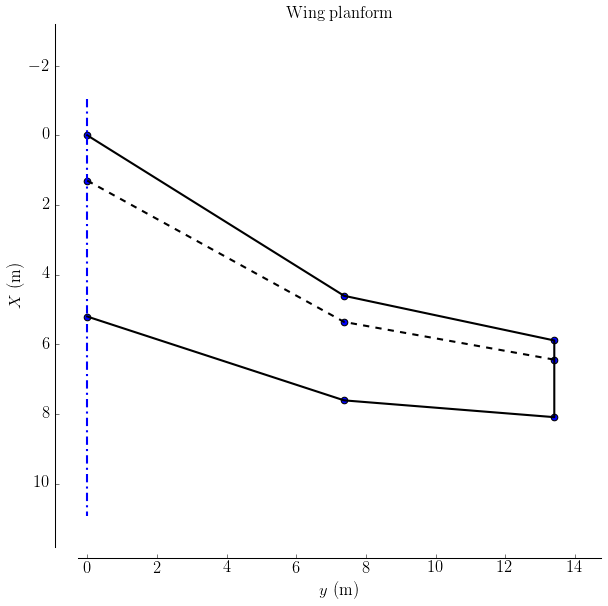

In [61]:
plot_planform_cw(c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2)

We can calculate now some geometric data depending on the assigned shape:
\begin{equation}
S,\,AR,\,\bar{c},\,\,X_\mathrm{le,\bar{c}},\,Y_\mathrm{\bar{c}}
\end{equation}

The function $c(y)$ is the piecewise linear law that gives the chord at the generic spanwise station $y\in \big[0,\frac{1}{2}b\big]$. This has the form

\begin{equation}
c(y) = 
\begin{cases}
A_{c,1} y + B_{c,1}  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
A_{c,2} \big( y - \frac{1}{2}b_{\mathrm{k}} \big) + B_{c,2} & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

with 

\begin{equation}
A_{c} = 
\begin{cases}
A_{c,1} = \dfrac{2}{b_{\mathrm{k}}} \left( c_{\mathrm{k}} - c_{\mathrm{r}} \right)  
  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
A_{c,2} = \dfrac{2}{b - b_{\mathrm{k}}} \left( c_{\mathrm{t}} - c_{\mathrm{k}} \right)  
  & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

and

\begin{equation}
B_{c} = 
\begin{cases}
B_{c,1} = c_{\mathrm{r}}
  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
B_{c,2} = c_{\mathrm{k}}
  & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

Let us define function $c(y)$ calculating the above two coefficients:

In [62]:
A_1 = 2*(c_k - c_r)/b_k; B_1 = c_r;
A_2 = (c_t - c_k)/(b/2 - b_k/2); B_2 = c_k;
Latex(
    r'\begin{array}{ll}'
    +r'A_{c,1} = \dfrac{2}{ b_{\mathrm{k}}} \left( c_{\mathrm{t}} - c_{\mathrm{k}} \right) & ='
        +r'{0:.3}'.format(A_1)
    +r'\\'
    +r'B_{c,1} = c_{r,1} & =' + r'{0:.3}\,\text{{m}}'.format(c_r)
    +r'\\'
    +r'A_{c,2} = \dfrac{2}{ b_{\mathrm{2}}} \left( c_{\mathrm{t,2}} - c_{\mathrm{r,2}} \right) & ='
        +r'{0:.3}' .format(A_2)
    +r'\\'
    +r'B_{c,2}=c_{r,2} & =' + r'{0}\,\text{{m}}'.format(c_k)
    +r'\end{array}'
)

<IPython.core.display.Latex object>

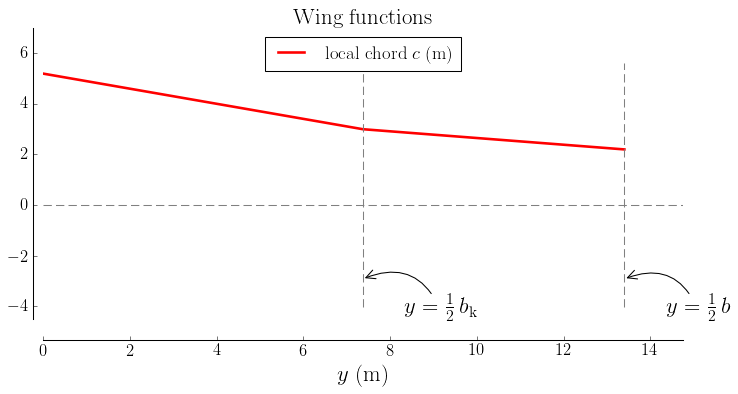

In [63]:
plot_wing_functions(c_r, c_k, c_t, 
                    [], [], [], [], [], # eps_k, eps_t, alpha0l_r, alpha0l_k, alpha0l_t,
                    b_k, b, Lambda_le_1, Lambda_le_2, 
                    ymax = 7, ymin = -4.5,
                    figsize = (11,5), vshift_xaxis=20,
                    f_chord = f_chord)

## Inner panel

Let define some geometric data regarding the inner panel:

Let us define the taper ratio
\begin{equation}
\lambda_1 = \frac{ c_{\mathrm{k}} }{ c_{\mathrm{r}} }
\end{equation}

In [64]:
taper_1=c_k/c_r
display(Math(r'\lambda_{1} =\,' + '{0:.3}'.format(taper_1)))

<IPython.core.display.Math object>

If we integrate the law $c(y)$ over the inner we have the value of $S$:

\begin{equation}
2 \int_0^{b_1/2} c(y) \, \text{d}y = 2 \int_0^{b_1/2} \Big( A_{c,1} \, y + B_{c,1} \Big) \, \text{d}y = S
\end{equation}


In [65]:
A_1 = 2*(c_k - c_r)/b_k; B_1 = c_r;
S_i = integrate_S(A_1,B_1,b_k)[0]
Latex(r'$S_{inner} = \,' + r'{0:.4}$'.format(S_i) + r'$\,\mathrm{m}^2$')

<IPython.core.display.Latex object>

In [66]:
c_law_integral_indefinite=integrate_S(A_1,B_1,b)[1]
display_workflow_S(b_k, A_1, B_1, c_law_integral_indefinite,S_i)

<IPython.core.display.Latex object>

And then we can define the inner aspect ratio 
\begin{equation}
%\label{eq:AspectRatio}
AR_\mathrm{1} = \frac{ b_{k,1}^2 }{ S }
\end{equation}

that in this case equals to : 

In [67]:
AR_i=b_k*b_k/S_i
display(Math(r'\text{aspect ratio:}\quad AR_\textrm{1} = '+ '{0:.4}'.format(AR_i)))

<IPython.core.display.Math object>

Let us calculate the value of the inner mean aerodinamic chord :

In [68]:
c_mean_1= (2/3)*c_r*(1+taper_1+(taper_1)*(taper_1))/(1+taper_1)
Latex(
r'\begin{align*}'
    + r'\bar{c}_\mathrm{1} = \frac{2}{3}c_\mathrm{r,1}\frac{1 + \lambda_1 + \lambda_1^2}{1+\lambda_1}'
    + r'& =' +r'{0:.4}'.format(c_mean_1) +r'\,\text{m}'
    + r'\end{align*}'
        )

<IPython.core.display.Latex object>

Let us now calculate the logitudinal distance from the leading edge of the inner mean aerodinamic chord to the one of the root chord.

\begin{equation}
X_{le,\bar{c_1}} = \frac{b_{k,1}}{6}\,\frac{ 1 + 2\lambda_1}{1+\lambda_1}\,\tan{\Lambda_{le,1}}
\end{equation}

In this case : 


In [69]:
tan_lambda_1 = math.tan(Lambda_le_1)
x_lec_1=(b_k/6)*((1+2*taper_1)/(1+taper_1))*tan_lambda_1
Latex(
r'\begin{align*}'
+r'\text{tan}' + r'(\Lambda_\mathrm{le,1})' + r'='
    +r'\text{tan}' + r'({0:.4}\,'.format(Lambda_le_1) +r'\text{rad})'
    
    + r' = {0:.4}'.format(tan_lambda_1)
+ r'\end{align*}'
)

<IPython.core.display.Latex object>

and this value leads us to :

In [70]:
Latex(
r'\begin{align*}'
+ r'X_\mathrm{le,\bar{c}1}' + r'=' + r'{0:.4}'.format(x_lec_1) + r'\,\text{m}'
    +r'\end{align*}'
    )

<IPython.core.display.Latex object>

Let us calculate now the distance, computed from wing root, of the mean aerodinamic chord station .
\begin{equation}
Y_{\bar{c},1} = \frac{b_{k,1}}{6} \frac{1+2\lambda_1}{1+\lambda_1}
\end{equation}


This formula with the given inner panel shape data, gives :

In [71]:
y_c=(b_k/6)*((1+2*taper_1)/(1+taper_1))
Latex(
r'\begin{align*}'
    + r'Y_\mathrm{\bar{c},1} = \frac{b_k}{6}\frac{1 + 2\lambda_1}{1+\lambda_1}'
    + r'& =' +r'{0:.4}'.format(y_c) +r'\,\text{m}' 
    + r'\end{align*}'
    
        )

<IPython.core.display.Latex object>

## Outer panel

Let us do the same for  outer panel, by using the $c_k$ instead of $c_r$ and $c_t$ instead theof $c_k$. 


\begin{equation}
\lambda_2 = \frac{ c_{\mathrm{k}} }{ c_{\mathrm{r}} }
\end{equation}

In [72]:
taper_2=c_t/c_k
display(Math(r'\lambda_{2} =\,' + '{0:.3}'.format(taper_2)))

<IPython.core.display.Math object>

Let us calculate $S_{outer}$:

In [73]:
A_2 = (c_t - c_k)/(b_k2/2); B_2 = c_k;
S_o=integrate_S(A_2,B_2,b_k2)[0]
Latex(r'$S_{outer} = \,' + r'{0:.4}$'.format(S_o) + r'$\,\mathrm{m}^2$')

<IPython.core.display.Latex object>

In [74]:
c_law_integral_indefinite_o=integrate_S(A_2,B_2,b_k2)[1]
display_workflow_S(b_k, A_2, B_2, c_law_integral_indefinite_o, S_o)

<IPython.core.display.Latex object>

And then we can define the inner aspect ratio 
\begin{equation}
%\label{eq:AspectRatio}
AR_\mathrm{2} = \frac{ b_{k,2}^2 }{ S }
\end{equation}

In [75]:
AR_2=b_k2*b_k2/S_o
display(Math(r'\text{aspect ratio:}\quad AR_2 = '+ '{0:.4}'.format(AR_2)))

<IPython.core.display.Math object>

In [76]:
c_mean_2= (2/3)*c_k*(1+taper_2+(taper_2)*(taper_2))/(1+taper_2)
Latex(
r'\begin{align*}'
    + r'\bar{c}_\mathrm{2} = \frac{2}{3}c_\mathrm{r,2}\frac{1 + \lambda_2 + \lambda_2^2}{1+\lambda_2}'
    + r'& =' +r'{0:.4}'.format(c_mean_2) +r'\,\text{m}'
    + r'\end{align*}'
    
        )

<IPython.core.display.Latex object>

\begin{equation}
X_{le,\bar{c_2}} - X_B= \frac{b}{6}\,\frac{ 1 + 2\lambda_2}{1+\lambda_2}\,\tan{\Lambda_{le,2}}
\end{equation}

That formula defines the logitudinal distance from the leading edge of the outer mean aerodinamic chord to the one of the kink chord. 
Note that for the inner panel, we had to consider the leading edge of the root chord instead.

In [77]:
tan_lambda_2 = math.tan(Lambda_le_2)
x_lec_2=(b_k2/6)*((1+2*taper_2)/(1+taper_2))*tan_lambda_2
Latex(
r'\begin{align*}'
+ r'X_\mathrm{le,\bar{c}1}' + r'=' + r'{0:.4}'.format(x_lec_2) + r'\,\text{m}'
    +r'\end{align*}'
    )

<IPython.core.display.Latex object>

The actual distance from the plane of symmetry of the wing, of the outer mean aerodinamic chord station is given by :


In [78]:
y_c_2=(b_k/2) + (b_k2/6)*((1+2*taper_2)/(1+taper_2))
Latex(
r'\begin{align*}'
    + r'Y_\mathrm{\bar{c},2} = \frac{b_{k,1}}{2} + \frac{b_{k,2}}{6}\frac{1 + 2\lambda_2}{1+\lambda_2}'
    + r'& =' +r'{0:.4}'.format(y_c_2) +r'\,\text{m}' 
    + r'\end{align*}'
    
        )

<IPython.core.display.Latex object>

In [79]:
# %run ./src/aerodynamic_center_wing/init.py
#plot_planform(c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2, 
             # mac=c_mac, X_le_mac=X_le_mac, Y_mac=Y_mac)

## Data of the complete wing

We can now define the surface of the complete wing .

In [80]:
surface=S_i+S_o

Latex(
r'\begin{align*}'
+ r'S &' + r'='+r'S_1\,+\,S_2' + r'\,=\,'
    + r'{0:.4}'.format(S_i) + r'\,\text{m}^2' +r'\,+\,'  + r'{0:.4}'.format(S_o) + r'\,\text{m}^2' + r'\,=\,'
    + r'{0:.4}'.format(surface) + r'\,\text{m}^2'
    +r'\end{align*}'
)

<IPython.core.display.Latex object>

Let us now calculate the AR of the complete wing.

In [81]:
AR=b*b/surface
display(Math(r'\text{aspect ratio:}\quad AR = '+ '{0:.4}'.format(AR)))

<IPython.core.display.Math object>

From the General calculation formula of mean aerodynamic chord written for a wing cranked a two panels

\begin{equation}
\bar{c} = \frac{2}{S} \int_{0}^{b/2} c^2(y) \, \mathrm{d}y = 2 \,(\, \int_{0}^{b_1/2} c_1^2(y) \, \mathrm{d}y + \int_{b_1/2}^{b_2/2} c_2^2(y) \, \mathrm{d}y  )
\end{equation}

we obtain a simple formula to calculate $\bar{c}$ :

\begin{equation}
\bar{c} = \frac{ S_1\bar{c}_1 + S_2\bar{c}_2 } { S_1 + S_2 }
\end{equation}

that gives us the following value :

In [82]:
c_mean = (S_i*c_mean_1 + S_o*c_mean_2) / (S_i + S_o)
display(Math(r'\text{Mean Aerodinamic Chord:}\quad \bar{c} = '+ '{0:.4}'.format(c_mean) + r'\,\text{m}'))

<IPython.core.display.Math object>

We have $\bar{c}$>c_{t,1}, so the y station of the mean aerodynamic chord has to be searched between the y of the inner panel,using the $c_1(y) $ law:

\begin{equation}
\bar{c}=A_{c,1}Y_{\bar{c}}+B_{c,1} =>  Y_{\bar{c}}=\frac{\bar{c}-B_{c,1}}{A_{c,1}}
\end{equation}

In [83]:
y_mean=(c_mean-B_1)/A_1
Latex(
    r'\begin{align*}'
    +r'Y_{\bar{c}}=\frac{\bar{c}-B_{c,1}}{A_{c,1}}='
    +r'{0:.3}'  .format(y_mean)
    +r'\ m'
    +r'\end{align*}'
)

<IPython.core.display.Latex object>

When S2>S1 we have to use this formula:

\begin{equation}
Y_{\bar{c}}=\frac{b_1}{2}+\frac{\bar{c}-B_{c,2}}{A_{c,2}}
\end{equation}

Let us calculate $X_{le,\bar{c}}$:

In [84]:
tan_lambda_1 = math.tan(Lambda_le_1)
x_lec=y_mean*tan_lambda_1
Latex(
    r'\begin{align*}'
    +r'X_{le,\bar{c}}=Y_{\bar{c}}tan\Lambda_{le,1}='
    +r'{0:.3}' .format(x_lec)
    +r'\ m'
    +r'\end{align*}'
)

<IPython.core.display.Latex object>

When S2>S1 we have to use this formula:

\begin{equation}
X_{le,\bar{c}}=\frac{b_1}{2}tan\Lambda_{le,1}+\frac{\bar{c}-B_{c,2}}{A_{c,2}}tan{\Lambda_{le,2}}
\end{equation}

We can now check these data directly on the wing planform.

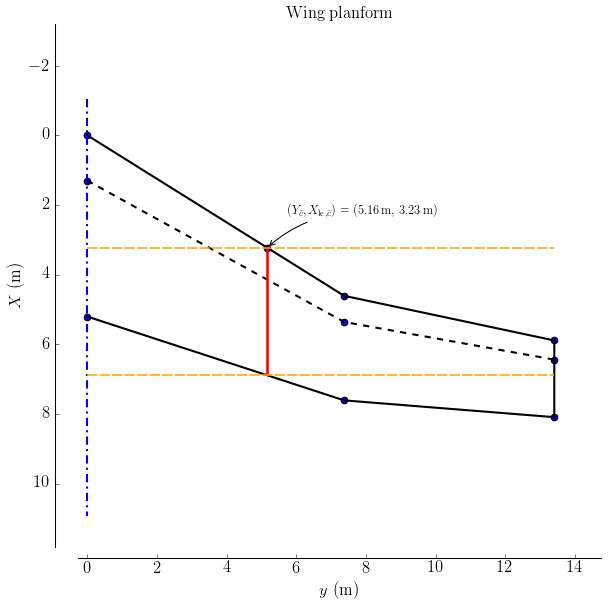

In [85]:
plot_planform_cw(c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2, 
              mac=c_mean, X_le_mac=x_lec, Y_mac=y_mean)

# Store Data

In [86]:
import shelve
store = shelve.open('./resources/cranked_wing_store', flag='n')
store['c_r'] = c_r
store['c_k'] = c_k
store['c_t'] = c_t
store['b_k'] = b_k
store['b'] = b
store['Lambda_le_1'] = Lambda_le_1
store['Lambda_le_2'] = Lambda_le_2
store['S_ref'] = surface
store['c_mac'] = c_mean
store['X_le_mac'] = x_lec
store['Y_mac'] = y_mean
store.close()